In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

from decimal import Decimal

import mesa_helper as mh
import os
import shutil
import copy

from scipy import ndimage, interpolate, optimize

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
x = np.arange(0.,10.05, 0.1)
y = np.arange(-5.,5.05, 0.05)

xgrid, ygrid = np.meshgrid(x,y)

z0 = ygrid#xgrid #- ygrid
z1 = np.log(xgrid+0.5) + np.log(ygrid+5.05)
z2 = (np.sin(xgrid) + np.cos(ygrid)) * x + 16

print(np.min(z0))
print(np.max(z0))

print(np.min(z1))
print(np.max(z1))

print(np.min(z2))
print(np.max(z2))

-5.0
4.9999999999999645
-3.68887945411394
4.658947891668559
0.5601423063928799
31.9561074678452


In [16]:
# first: interpolate s.t. we have x as a function of (y, z0)
print(np.shape(x))
print(np.shape(y))
print(np.shape(z0))
print(np.shape(xgrid))

(101,)
(201,)
(201, 101)
(201, 101)


In [17]:
desired_z0arr = np.arange(-5.,15.05,0.05)
desired_z1arr = np.arange(-3.7,4.70,0.05)
desired_z2arr = np.arange(0.5,32.05, 0.05)

In [18]:
interp_z0_given_xy_cubic = interpolate.RegularGridInterpolator(points=(x, y), values=z0.T, bounds_error=False, fill_value=None, method='cubic')
interp_z0_given_xy_linear = interpolate.RegularGridInterpolator(points=(x, y), values=z0.T, bounds_error=False, fill_value=None, method='linear')

def interp_z0(x, y, method='cubic'):
    if method == 'cubic':
        return interp_z0_given_xy_cubic((x,y))
    elif method == 'linear':
        return interp_z0_given_xy_linear((x,y))
        
def z0_abs_diff(x, z0, y, method='cubic'):
    return np.abs(z0 - interp_z0(x,y,method))

def solve_z0(z0, y, x0guess=5.,method='cubic'):
    opt = optimize.minimize(z0_abs_diff, x0=x0guess, args=(z0, y, method), bounds=[(0,10)],tol=1.e-10)
    opt_x = opt.x[0]

    return opt_x

new_ygrid, new_z0grid = np.meshgrid(y, desired_z0arr)

interpolated_xgrid = np.zeros_like(new_ygrid)

for i in range(np.shape(new_ygrid)[1]):
    this_y = new_ygrid[0][i]
    for j in range(np.shape(new_ygrid)[0]):
        this_z0 = new_z0grid[:,0][j]
        interpolated_x = solve_z0(z0=this_z0, y=this_y, x0guess=5., method='cubic')
        interpolated_xgrid[j,i] = interpolated_x
        

In [19]:
interp_z1_given_xy_cubic = interpolate.RegularGridInterpolator(points=(x, y), values=z1.T, bounds_error=False, fill_value=None, method='cubic')
interp_z1_given_xy_linear = interpolate.RegularGridInterpolator(points=(x, y), values=z1.T, bounds_error=False, fill_value=None, method='linear')

def interp_z1(x, y, method='cubic'):
    if method == 'cubic':
        return interp_z1_given_xy_cubic((x,y))
    elif method == 'linear':
        return interp_z1_given_xy_linear((x,y))
        
def z1_abs_diff(x, z1, y, method='cubic'):
    return np.abs(z1 - interp_z1(x,y,method))

def solve_z1(z1, y, x0guess=5.,method='cubic'):
    opt = optimize.minimize(z1_abs_diff, x0=x0guess, args=(z1, y, method), bounds=[(0,10)],tol=1.e-10)
    opt_x = opt.x[0]

    return opt_x

new_ygrid_1, new_z1grid = np.meshgrid(y, desired_z1arr)

interpolated_xgrid_1 = np.zeros_like(new_ygrid_1)

for i in range(np.shape(new_ygrid_1)[1]):
    this_y = new_ygrid_1[0][i]
    for j in range(np.shape(new_ygrid_1)[0]):
        this_z1 = new_z1grid[:,0][j]
        interpolated_x = solve_z1(z1=this_z1, y=this_y, x0guess=5., method='cubic')
        interpolated_xgrid_1[j,i] = interpolated_x
        

In [20]:
interp_z2_given_xy_cubic = interpolate.RegularGridInterpolator(points=(x, y), values=z2.T, bounds_error=False, fill_value=None, method='cubic')
interp_z2_given_xy_linear = interpolate.RegularGridInterpolator(points=(x, y), values=z2.T, bounds_error=False, fill_value=None, method='linear')

def interp_z2(x, y, method='cubic'):
    if method == 'cubic':
        return interp_z2_given_xy_cubic((x,y))
    elif method == 'linear':
        return interp_z2_given_xy_linear((x,y))
        
def z2_abs_diff(x, z2, y, method='cubic'):
    return np.abs(z2 - interp_z2(x,y,method))

def solve_z2(z2, y, x0guess=5.,method='cubic'):
    opt = optimize.minimize(z2_abs_diff, x0=x0guess, args=(z2, y, method), bounds=[(0,10)],tol=1.e-10)
    opt_x = opt.x[0]

    return opt_x

new_ygrid_2, new_z2grid = np.meshgrid(y, desired_z2arr)

interpolated_xgrid_2 = np.zeros_like(new_ygrid_2)

for i in range(np.shape(new_ygrid_2)[1]):
    this_y = new_ygrid_2[0][i]
    for j in range(np.shape(new_ygrid_2)[0]):
        this_z2 = new_z2grid[:,0][j]
        interpolated_x = solve_z2(z2=this_z2, y=this_y, x0guess=5., method='cubic')
        interpolated_xgrid_2[j,i] = interpolated_x
        

In [21]:
print(np.shape(new_ygrid_2))
print(np.shape(new_ygrid_2[0]))

(631, 201)
(201,)


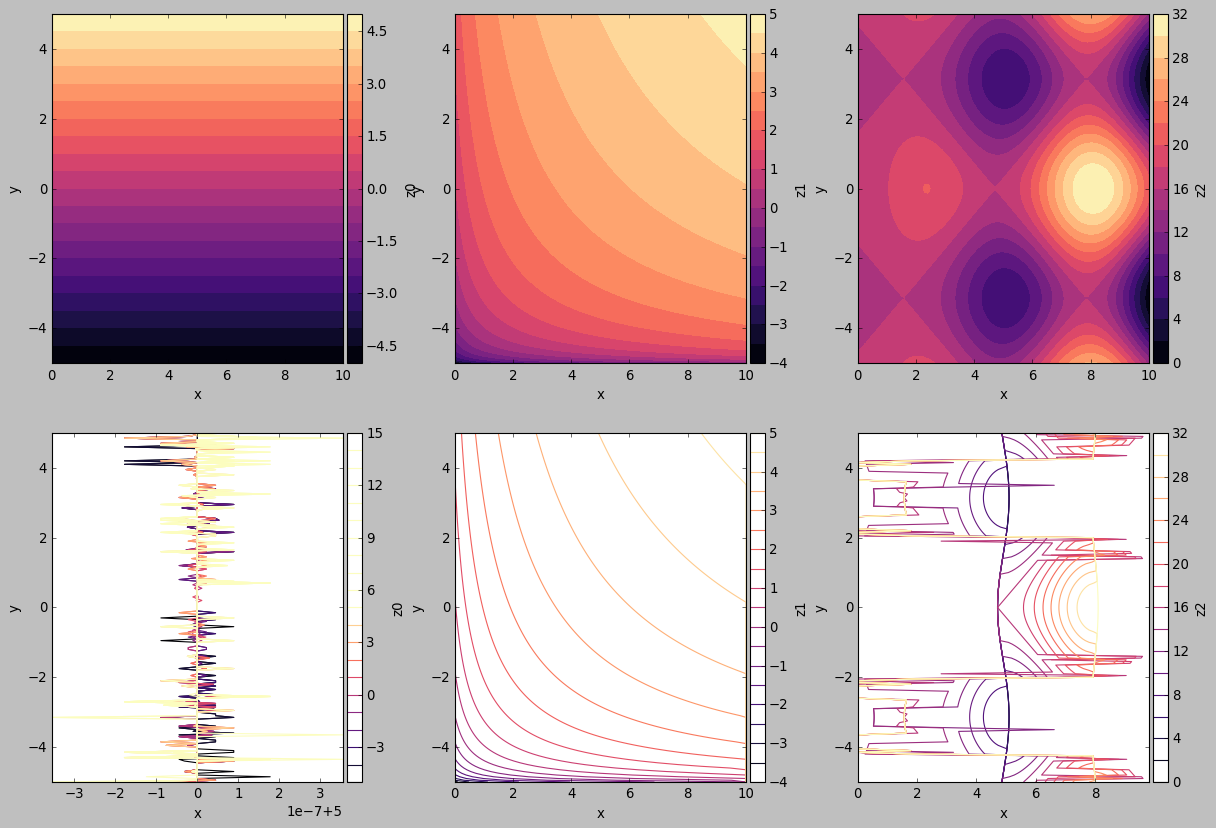

In [27]:
fig, axes = plt.subplots(2,3,figsize=(18,12))

divider00 = make_axes_locatable(axes[0,0])
cax00 = divider00.append_axes('right', size='5%', pad=0.05)
cs00 = axes[0,0].contourf(x,y,z0,cmap='magma',levels=20,vmin=np.min(z0),vmax=np.max(z0))
fig.colorbar(cs00, cax=cax00, orientation='vertical',label='z0')

divider01 = make_axes_locatable(axes[0,1])
cax01 = divider01.append_axes('right', size='5%', pad=0.05)
cs01 = axes[0,1].contourf(x,y,z1,cmap='magma',levels=20)
fig.colorbar(cs01, cax=cax01, orientation='vertical',label='z1')

divider02 = make_axes_locatable(axes[0,2])
cax02 = divider02.append_axes('right', size='5%', pad=0.05)
cs02 = axes[0,2].contourf(x,y,z2,cmap='magma',levels=20)
fig.colorbar(cs02, cax=cax02, orientation='vertical',label='z2')


divider10 = make_axes_locatable(axes[1,0])
cax10 = divider10.append_axes('right', size='5%', pad=0.05)
cs10 = axes[1,0].contour(interpolated_xgrid, new_ygrid, new_z0grid, cmap='magma',levels=20,vmin=np.min(z0),vmax=np.max(z0))
fig.colorbar(cs10, cax=cax10, orientation='vertical',label='z0')

divider11 = make_axes_locatable(axes[1,1])
cax11 = divider11.append_axes('right', size='5%', pad=0.05)
cs11 = axes[1,1].contour(interpolated_xgrid_1, new_ygrid_1, new_z1grid,cmap='magma',levels=20)
fig.colorbar(cs11, cax=cax11, orientation='vertical',label='z1')

divider12 = make_axes_locatable(axes[1,2])
cax12 = divider12.append_axes('right', size='5%', pad=0.05)
cs12 = axes[1,2].contour(interpolated_xgrid_2, new_ygrid_2, new_z2grid,cmap='magma',levels=20)
fig.colorbar(cs12, cax=cax12, orientation='vertical',label='z2')

for ax in np.ravel(axes):
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.subplots_adjust(wspace=0.3)
plt.show()



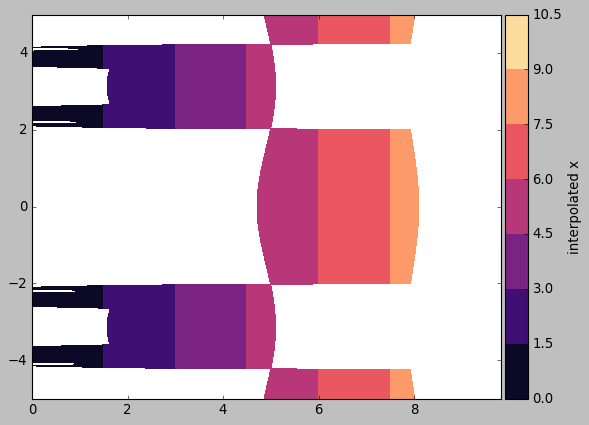

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
divider0 = make_axes_locatable(ax)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = ax.contourf(interpolated_xgrid_2, new_ygrid_2, interpolated_xgrid_2, cmap='magma')
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='interpolated x')

plt.show()

In [24]:
print(interpolated_xgrid_2[0,0])
print(new_ygrid_2[0,0])
print(new_z2grid[0,0])


4.858171674946059
-5.0
0.5


# try RectBivariateSpline instead

In [25]:
rbs_z0 = interpolate.RectBivariateSpline(y, x, z0)
rbs_z1 = interpolate.RectBivariateSpline(y, x, z1)
rbs_z2 = interpolate.RectBivariateSpline(y, x, z2)

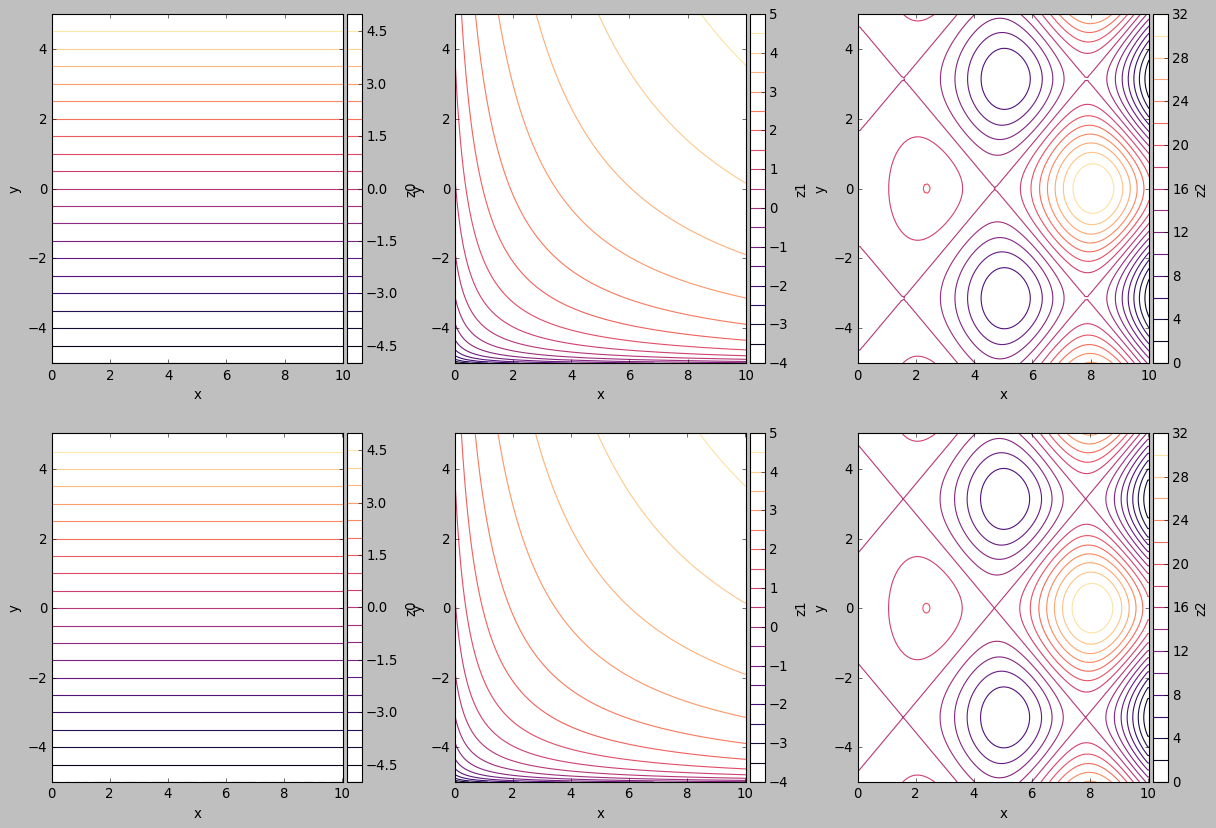

In [26]:
fine_x = np.arange(0.,10.05, 0.01)
fine_y = np.arange(-5.,5.05, 0.01)

fine_xgrid, fine_ygrid = np.meshgrid(fine_x,fine_y)

fine_z0 = rbs_z0(fine_y, fine_x)
fine_z1 = rbs_z1(fine_y, fine_x)
fine_z2 = rbs_z2(fine_y, fine_x)


fig, axes = plt.subplots(2,3,figsize=(18,12))

divider00 = make_axes_locatable(axes[0,0])
cax00 = divider00.append_axes('right', size='5%', pad=0.05)
cs00 = axes[0,0].contour(x,y,z0,cmap='magma',levels=20)
fig.colorbar(cs00, cax=cax00, orientation='vertical',label='z0')

divider01 = make_axes_locatable(axes[0,1])
cax01 = divider01.append_axes('right', size='5%', pad=0.05)
cs01 = axes[0,1].contour(x,y,z1,cmap='magma',levels=20)
fig.colorbar(cs01, cax=cax01, orientation='vertical',label='z1')

divider02 = make_axes_locatable(axes[0,2])
cax02 = divider02.append_axes('right', size='5%', pad=0.05)
cs02 = axes[0,2].contour(x,y,z2,cmap='magma',levels=20)
fig.colorbar(cs02, cax=cax02, orientation='vertical',label='z2')


divider10 = make_axes_locatable(axes[1,0])
cax10 = divider10.append_axes('right', size='5%', pad=0.05)
cs10 = axes[1,0].contour(fine_xgrid, fine_ygrid, fine_z0, cmap='magma',levels=20)
fig.colorbar(cs10, cax=cax10, orientation='vertical',label='z0')

divider11 = make_axes_locatable(axes[1,1])
cax11 = divider11.append_axes('right', size='5%', pad=0.05)
cs11 = axes[1,1].contour(fine_xgrid, fine_ygrid, fine_z1,cmap='magma',levels=20)
fig.colorbar(cs11, cax=cax11, orientation='vertical',label='z1')

divider12 = make_axes_locatable(axes[1,2])
cax12 = divider12.append_axes('right', size='5%', pad=0.05)
cs12 = axes[1,2].contour(fine_xgrid, fine_ygrid, fine_z2,cmap='magma',levels=20)
fig.colorbar(cs12, cax=cax12, orientation='vertical',label='z2')

for ax in np.ravel(axes):
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.subplots_adjust(wspace=0.3)
plt.show()

